## Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, accuracy_score,f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier 
from sklearn.naive_bayes import MultinomialNB


## Read in cleaned data

In [2]:
df_subreddits = pd.read_csv('./00_cleaned_data/subreddits.csv')

In [3]:
df_subreddits.head()

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ...",131,26,0
1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...,81,13,0
2,A good book will always be new.,NaN,agreatday248,1643317210,showerthoughts,A good book will always be new.,31,7,0
3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,...",132,26,0
4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...,118,22,0


## Train - Test - Split

In [4]:
X = df_subreddits[['full_text', 'letter_count', 'word_count']]

y = df_subreddits['subreddit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

In [6]:
X_train.shape

(14548, 3)

In [7]:
X_test.shape

(4850, 3)

In [8]:
y_train.shape

(14548,)

In [9]:
y_test.shape

(4850,)

## VotingClassifier ensemble model

##### Best models:
Boosting with all features
<br>
Naive Bayes with all features

In [10]:
cv = CountVectorizer(max_df=0.8, min_df=0, ngram_range=(1,2))

In [11]:
text_vectorizer = make_column_transformer((cv, 'full_text'), remainder='passthrough', n_jobs=-1, verbose_feature_names_out=False)

In [12]:
gb = GradientBoostingClassifier(max_depth=4, n_estimators=150)

In [13]:
nb = MultinomialNB(alpha=0.1)

In [15]:
vc = VotingClassifier(
    [
        ('gb', gb),
        ('nb', nb)
    ],
    voting='soft',
    weights=[1, 0.9],
    n_jobs=-1
)

In [16]:
pipe = make_pipeline(text_vectorizer, vc)

In [17]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('countvectorizer',
                                                  CountVectorizer(max_df=0.8,
                                                                  min_df=0,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'full_text')],
                                   verbose_feature_names_out=False)),
                ('votingclassifier',
                 VotingClassifier(estimators=[('gb',
                                               GradientBoostingClassifier(max_depth=4,
                                                                          n_estimators=150)),
                                              ('nb', MultinomialNB(alpha=0.1))],
               

In [18]:
y_preds = pipe.predict(X_test)

In [19]:
y_preds

array(['crazyideas', 'crazyideas', 'crazyideas', ..., 'crazyideas',
       'showerthoughts', 'crazyideas'], dtype=object)

### Accuracy score

In [20]:
pipe.score(X_test, y_test)

0.825360824742268

In [21]:
accuracy_score(y_test, y_preds)

0.825360824742268

### Recall/sensitivity score

In [22]:
recall_score(y_test, y_preds, pos_label='crazyideas')

0.8992718446601942

### Precision score

In [23]:
precision_score(y_test, y_preds, pos_label='crazyideas')

0.7880184331797235

### F1 Score

In [24]:
f1_score(y_test, y_preds, pos_label='crazyideas')

0.8399773285471377

### Confusion Matrix

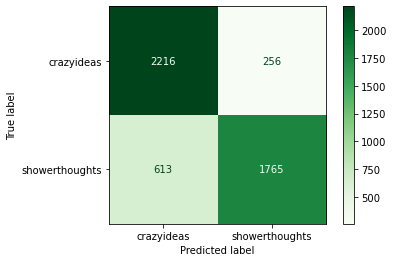

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Greens');